# Лабораторная работа 1

### Гончаров Сергей Витальевич

**Цель работы:** Провести полный статистический анализ колонки Sleep_Hours из датасета teen_phone_addiction_dataset.csv

## Подготовка данных и библиотек

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

In [5]:
df = pd.read_csv('teen_phone_addiction_dataset.csv')
df.head()

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


In [8]:
N = 15
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']

col = cols[N % 7]
print(col)

sleep_hours = df[col]
sleep_hours.head()
print(f"Размер выборки: {len(sleep_hours)}")

Sleep_Hours
Размер выборки: 3000


## 1. Описательные статистики

Вычислим основные характеристики распределения для колонки Sleep_Hours.

### 1.1. Среднее значение

**Формула:** $$\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$$

Где $n$ - размер выборки, $x_i$ - значения наблюдений.

In [176]:
mean_value = sleep_hours.mean()
print(f"Среднее значение: {mean_value:.2f} часов")

Среднее значение: 6.49 часов


### 1.2. Дисперсия

**Формула для генеральной дисперсии:** $$\sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2$$

In [172]:
variance = np.var(sleep_hours, ddof=0)
std_dev = np.std(sleep_hours)
print(f"Дисперсия: {variance:.4f}")

Дисперсия: 2.2215


### 1.3. Мода

**Определение:** Мода - наиболее часто встречающееся значение в выборке.

In [230]:
mode_result = mode(sleep_hours, keepdims=True)
mode_value = mode_result.mode[0]
print(f"Мода: {mode_value:.2f} часов")

Мода: 6.10 часов


### 1.4. Медиана

**Определение:** Медиана - значение, которое делит упорядоченную выборку пополам.

In [25]:
median_value = np.median(sleep_hours)
print(f"Медиана: {median_value:.2f} часов")

Медиана: 6.50 часов


### 1.5. Квартили

**Определение:** Квартили делят упорядоченную выборку на четыре равные части.
- $Q_1$ (25-й процентиль) - первый квартиль
- $Q_2$ (50-й процентиль) - второй квартиль (медиана)
- $Q_3$ (75-й процентиль) - третий квартиль

In [26]:
q25 = np.percentile(sleep_hours, 25)
q50 = np.percentile(sleep_hours, 50)
q75 = np.percentile(sleep_hours, 75)

print(f"Q1 (25%): {q25:.2f} часов")
print(f"Q2 (50%): {q50:.2f} часов")
print(f"Q3 (75%): {q75:.2f} часов")

Q1 (25%): 5.50 часов
Q2 (50%): 6.50 часов
Q3 (75%): 7.50 часов


### 1.6. Эксцесс

**Формула:** $$\text{Kurt} = \frac{E[(X-\mu)^4]}{\sigma^4} - 3$$

Эксцесс характеризует "остроту" вершины распределения:
- Kurt > 0: островершинное распределение
- Kurt < 0: плосковершинное распределение
- Kurt ≈ 0: близко к нормальному распределению

In [227]:
Ex = stats.kurtosis(sleep_hours)

if Ex > 0:
    interp = "Распределение имеет острый пик (по сравнению с нормальным)."
elif Ex < 0:
    interp = "Распределение имеет плосковершинную форму (по сравнению с нормальным, у которого Ex=0)."
else:
    interp = "Распределение совпадает по форме с нормальным."
if -0.5 < Ex < 3:
    interp += "\nПри этом распределение считается приближается к нормальному."

print(f"Эксцесс Ex: {Ex:.3f}\nИнтерпретация: {interp}")

Эксцесс Ex: -0.297
Интерпретация: Распределение имеет плосковершинную форму (по сравнению с нормальным, у которого Ex=0).
При этом распределение считается приближается к нормальному.


### 1.7. Асимметрия

**Формула:** $$\text{Skew} = \frac{E[(X-\mu)^3]}{\sigma^3}$$

Асимметрия характеризует симметричность распределения:
- Skew > 0: правосторонняя асимметрия (правый хвост длиннее)
- Skew < 0: левосторонняя асимметрия (левый хвост длиннее)
- Skew ≈ 0: симметричное распределение

In [222]:
A_s = stats.skew(sleep_hours)

if A_s > 0:
    skew_direction = "распределение скошено вправо (преобладают положительные отклонения)"
elif A_s < 0:
    skew_direction = "распределение скошено влево (преобладают отрицательные отклонения)"
else:
    skew_direction = "распределение симметрично"

abs_A_s = abs(A_s)

if abs_A_s <= 0.25:
    skew_degree = "малая"
elif 0.25 < abs_A_s <= 0.5:
    skew_degree = "умеренная"
elif 0.5 < abs_A_s <= 1.5:
    skew_degree = "большая"
else:
    skew_degree = "исключительно большая"

print(f"Асимметрия: {A_s:.3f}\nСкошенность: {skew_direction}\nСтепень асимметрии: {skew_degree}")

Асимметрия: 0.012
Скошенность: распределение скошено вправо (преобладают положительные отклонения)
Степень асимметрии: малая


### 1.8. Интерквартильный размах

**Формула:** $$\text{IQR} = Q_3 - Q_1$$

Интерквартильный размах характеризует разброс средних 50% данных.

In [31]:
iqr = q75 - q25
print(f"Интерквартильный размах: {iqr:.2f} часа/ов")

Интерквартильный размах: 2.00 часа/ов


## 1.9 Визуализация данных

### 1.9.1 Гистограмма

Гистограмма показывает распределение частот значений в выборке.

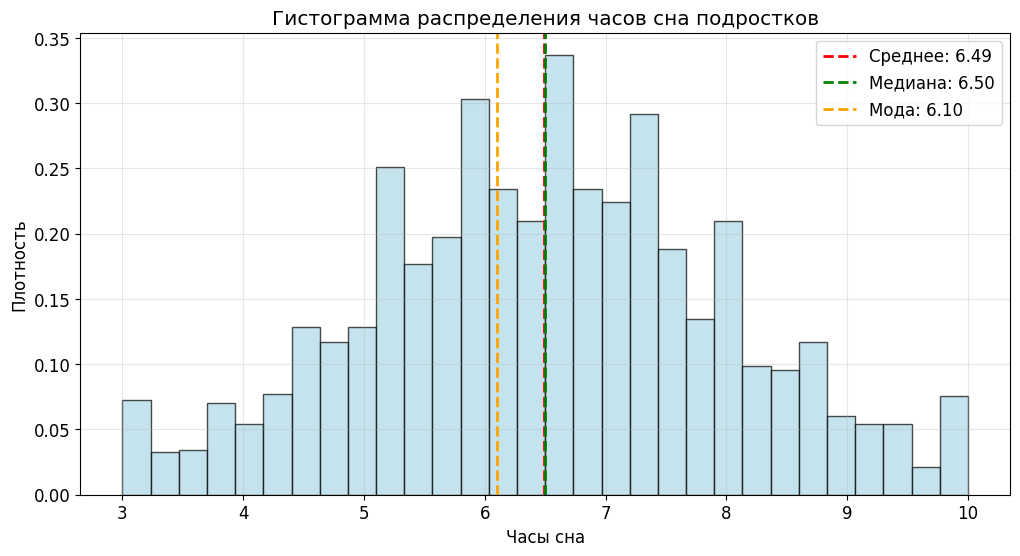

In [ ]:
# Построение гистограммы
plt.figure(figsize=(12, 6))

plt.hist(sleep_hours, bins=30, density=True, alpha=0.7, color='lightblue', edgecolor='black')

plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Среднее: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='--', linewidth=2, label=f'Медиана: {median_value:.2f}')
plt.axvline(mode_value, color='orange', linestyle='--', linewidth=2, label=f'Мода: {mode_value:.2f}')

plt.xlabel('Часы сна')
plt.ylabel('Плотность')
plt.title('Гистограмма распределения часов сна подростков')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 1.9.2 Эмпирическая функция распределения

**Определение:** Эмпирическая функция распределения (ECDF) показывает долю наблюдений, которые меньше или равны определенному значению.

**Формула:** $$F_n(x) = \frac{1}{n} \sum_{i=1}^{n} I(X_i \leq x)$$

где $I(X_i \leq x)$ - индикаторная функция.

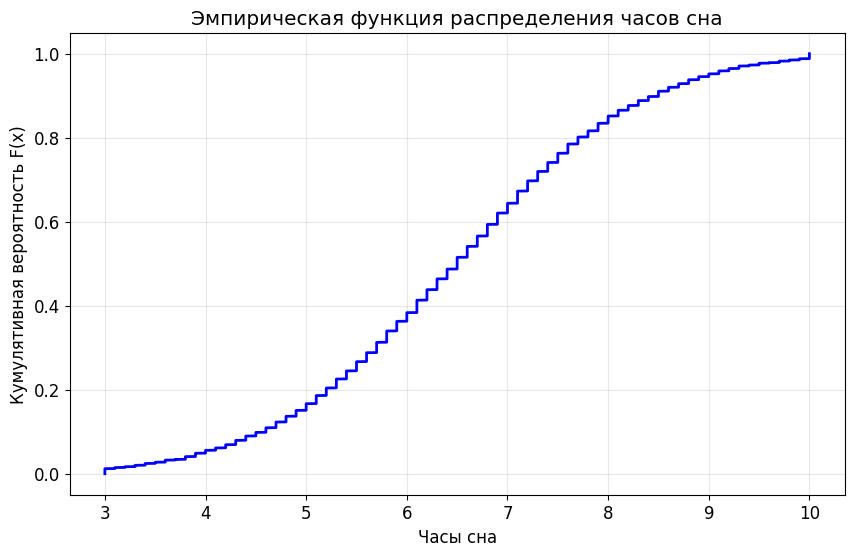

In [33]:
# Построение эмпирической функции распределения
plt.figure(figsize=(10, 6))

# Сортируем данные
sorted_data = np.sort(sleep_hours)
# Вычисляем кумулятивные вероятности
cumulative_prob = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# Строим ECDF
plt.plot(sorted_data, cumulative_prob, linewidth=2, color='blue')
plt.xlabel('Часы сна')
plt.ylabel('Кумулятивная вероятность F(x)')
plt.title('Эмпирическая функция распределения часов сна')
plt.grid(True, alpha=0.3)
plt.show()

## 2. Проверка нормальности распределения

### 2.1. Критерий хи-квадрат Пирсона

**Формула:** $$\chi^2 = \sum_{i=1}^{k} \frac{(n_i - n'_i)^2}{n'_i}$$

где:
- $n_i$ - наблюдаемая частота в i-том интервале
- $n'_i$ - ожидаемая частота в i-том интервале
- $k$ - количество интервалов

**Условия применения:**
- Все ожидаемые частоты $n'_i \geq 5$
- Степени свободы: $df = k - r - 1$, где $r$ - количество оцениваемых параметров

In [178]:
# Формула Стёрджиса для оценки числа интервалов
def sturges_formula(n):
    return int(1 + math.log2(n))

In [80]:
# Функция Гаусса (нужна для вычисления n'i)
def gaussian(z):
    return (1 / math.sqrt(2 * math.pi)) * math.exp(-z**2 / 2)


In [354]:
def interval_variation_series(data):
    bins = sturges_formula(len(data))

    data_min, data_max = np.min(data), np.max(data)

    # Создаём равномерные интервалы между min и max (bins+1 граница)
    edges = np.linspace(data_min, data_max, bins + 1)

    # Считаем, сколько значений попало в каждый интервал
    n_o, _ = np.histogram(data, bins=edges)

    # Вычисляем средние значения интервалов (середины)
    x_o = (edges[:-1] + edges[1:]) / 2

    return n_o, x_o


In [228]:
def expected_normal_dist_freq(left, right, mean_value, std_dev, n_o, x_o):
    """
    Вычисляет ожидаемые частоты для интервалов на основе нормального распределения.
    """
    # Количество интервалов (bins) по количеству наблюдаемых частот
    bins = len(n_o)

    h = (right - left) / bins
    n = n_o.sum()

    n_e = [0] * len(n_o)

    for i in range(bins):
        n_e[i] = n * (h / std_dev * gaussian((x_o[i] - mean_value) / std_dev))

    return n_e


In [151]:
def calc_chi2(n_o, n_e):
    """
    Вычисление критерия хи-квадрат Пирсона.

    Параметры:
    n_o - массив наблюдаемых частот
    n_e - массив ожидаемых частот

    Возвращает:
    значение хи-квадрат статистики
    """
    chi_sq = 0.0
    for observed, expected in zip(n_o, n_e):
        chi_sq += (observed - expected) ** 2 / expected
    return chi_sq

In [352]:
n_o, x_o = interval_variation_series(sleep_hours)
n_e = expected_normal_dist_freq(np.min(sleep_hours), np.max(sleep_hours), sleep_hours.mean(), np.std(sleep_hours), n_o, x_o)
print("Наблюдаемое распределение частот n:", n_o)
print("Ожидаемое распределение частот n':", [round(float(i), 2) for i in n_e])

Наблюдаемое распределение частот n: [ 83 102 185 307 412 373 470 423 275 184 105  81]
Ожидаемое распределение частот n': [46.87, 100.54, 185.03, 292.18, 395.85, 460.13, 458.9, 392.67, 288.28, 181.58, 98.13, 45.5]


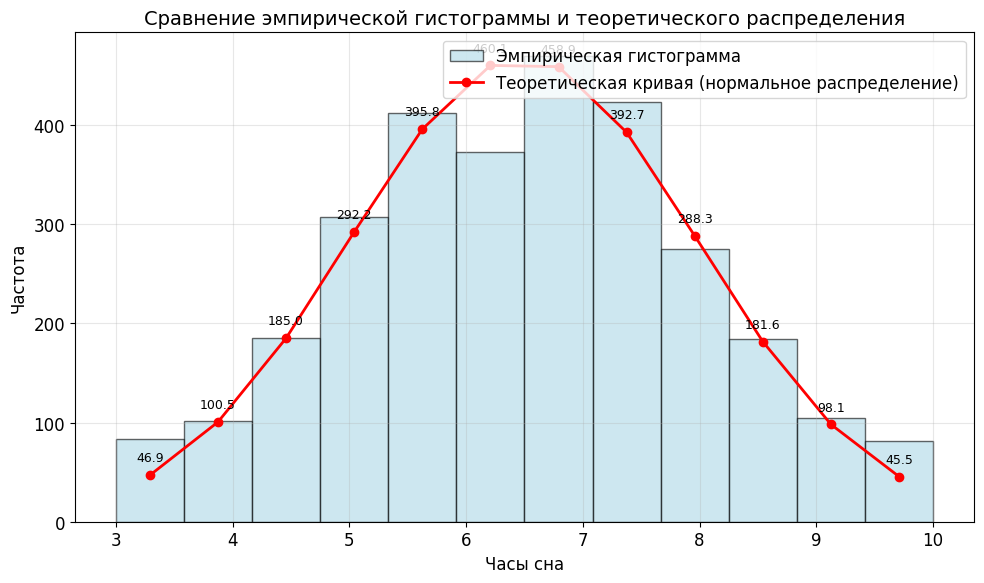

In [353]:
plt.figure(figsize=(10, 6))

# Построение эмпирической гистограммы
bins = sturges_formula(len(sleep_hours))
plt.hist(sleep_hours, bins=bins, alpha=0.6, color='lightblue',
         edgecolor='black', label='Эмпирическая гистограмма')

# Построение теоретической кривой через точки (x_o, n_e)
plt.plot(x_o, n_e, 'ro-', linewidth=2, markersize=6,
         color='red', label='Теоретическая кривая (нормальное распределение)')

plt.xlabel('Часы сна', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.title('Сравнение эмпирической гистограммы и теоретического распределения', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# Добавление значений на точки теоретической кривой
for i, (x, y) in enumerate(zip(x_o, n_e)):
    plt.annotate(f'{y:.1f}', (x, y), textcoords="offset points",
                xytext=(0,10), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

In [349]:
df = len(n_o) - 2 - 1 # r = 2, так как мы фиксируем среднее и стандартное отклонение
alpha = 0.05
chi2_critical = 19.92 # вычислено по таблице
df, alpha, chi2_critical

(30, 0.05, 19.92)

In [350]:
chi2_stat = calc_chi2(n_o, n_e)
print(f"Наблюдаемое отклонение: {chi2_stat}\nКритическое отклонение: {chi2_critical}")
if chi2_stat > chi2_critical:
    print("Гипотеза о нормальном распределении опровергается")
else:
    print("Гипотеза о нормальном распределении не опровергается")

Наблюдаемое отклонение: 307.1085009892248
Критическое отклонение: 19.92
Гипотеза о нормальном распределении опровергается


### 2.2. Q-Q plot (Квантиль-квантиль график)

**Принцип:** Q-Q plot сравнивает квантили выборочного распределения с квантилями теоретического нормального распределения.

**Интерпретация:**
- Точки близки к прямой линии → распределение близко к нормальному
- Систематические отклонения → распределение не нормально

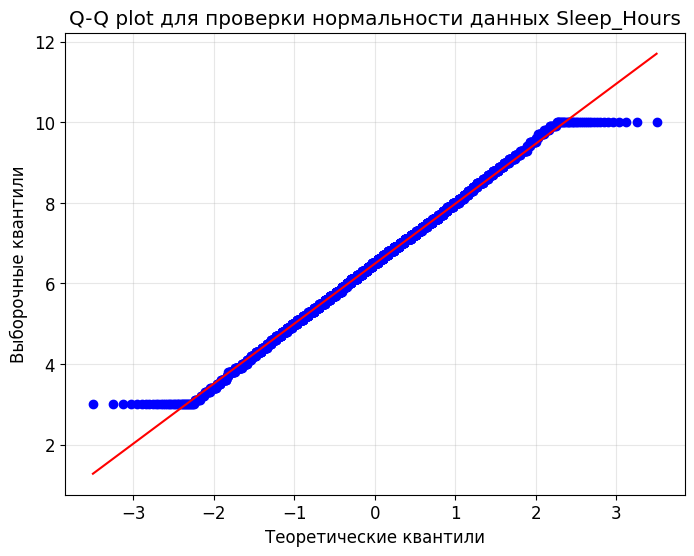

ИНТЕРПРЕТАЦИЯ Q-Q PLOT:
Если точки лежат близко к диагональной линии,
то распределение близко к нормальному.


In [ ]:
# Q-Q plot
plt.figure(figsize=(8, 6))

stats.probplot(sleep_hours, dist="norm", plot=plt)
plt.title('Q-Q plot для проверки нормальности данных Sleep_Hours')
plt.xlabel('Теоретические квантили')
plt.ylabel('Выборочные квантили')
plt.grid(True, alpha=0.3)
plt.show()

print("ИНТЕРПРЕТАЦИЯ Q-Q PLOT:")
print("Если точки лежат близко к диагональной линии,")
print("то распределение близко к нормальному.")

## 3. Обработка данных, попытка привести к нормальному распределению

In [362]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def preprocess_data(data):
    """
    Обработка данных для приближения к нормальному распределению:
    - стандартизация (Z-преобразование)
    - логарифмирование (для положительных значений)
    - нормализация Min-Max
    """

    # Стандартизация
    scaler = StandardScaler()
    data_standardized = scaler.fit_transform(data.reshape(-1, 1))

    # Логарифмирование (если данные положительные)
    data_log = np.log(data + 1)

    # Нормализация Min-Max
    minmax_scaler = MinMaxScaler()
    data_normalized = minmax_scaler.fit_transform(data.reshape(-1, 1))

    # IQR
    data_ = pd.Series(data)
    Q1 = data_.quantile(0.25)
    Q3 = data_.quantile(0.75)
    IQR = Q3 - Q1

    filtered_data = data_[~((data_ < (Q1 - 1.5 * IQR)) | (data_ > (Q3 + 1.5 * IQR)))]


    return {
        'standardized': pd.Series(data_standardized.flatten()),
        'log': pd.Series(data_log),
        'normalized': pd.Series(data_normalized.flatten()),
        'iqr': filtered_data,
    }


In [363]:
preprocessed_data = preprocess_data(np.array(sleep_hours))

print("Стандартизованные данные:", preprocessed_data['standardized'])
print("Логарифмированные данные:", preprocessed_data['log'])
print("Нормализованные данные:", preprocessed_data['normalized'])

Стандартизованные данные: 0      -0.261507
1       0.006866
2      -0.664066
3      -1.737556
4       0.141052
          ...   
2995   -0.060227
2996    0.543611
2997    0.006866
2998    0.677798
2999    0.275239
Length: 3000, dtype: float64
Логарифмированные данные: 0       1.960095
1       2.014903
2       1.871802
3       1.589235
4       2.041220
          ...   
2995    2.001480
2996    2.116256
2997    2.014903
2998    2.140066
2999    2.066863
Length: 3000, dtype: float64
Нормализованные данные: 0       0.442857
1       0.500000
2       0.357143
3       0.128571
4       0.528571
          ...   
2995    0.485714
2996    0.614286
2997    0.500000
2998    0.642857
2999    0.557143
Length: 3000, dtype: float64


Тип изменения: standardized
Среднее значение: -0.00 часов
Дисперсия: 1.0000
Мода: -0.26 часов
Медиана: 0.01 часов
Q1 (25%): -0.66 часов
Q2 (50%): 0.01 часов
Q3 (75%): 0.68 часов
Эксцесс Ex: -0.297
Интерпретация: Распределение имеет плосковершинную форму (по сравнению с нормальным, у которого Ex=0).
При этом распределение считается приближается к нормальному.
Асимметрия: 0.012
Скошенность: распределение скошено вправо (преобладают положительные отклонения)
Степень асимметрии: малая
Интерквартильный размах: 1.34 часа/ов


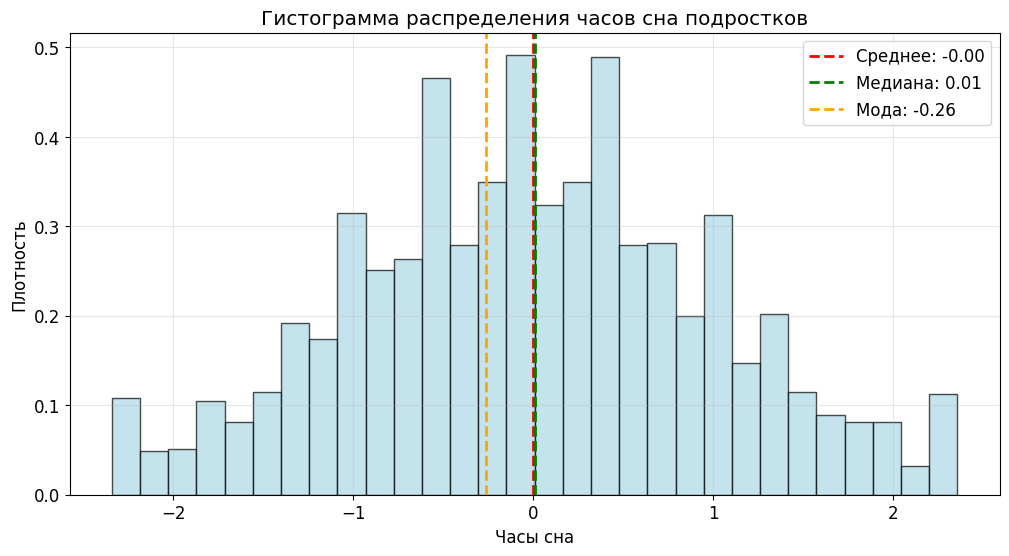

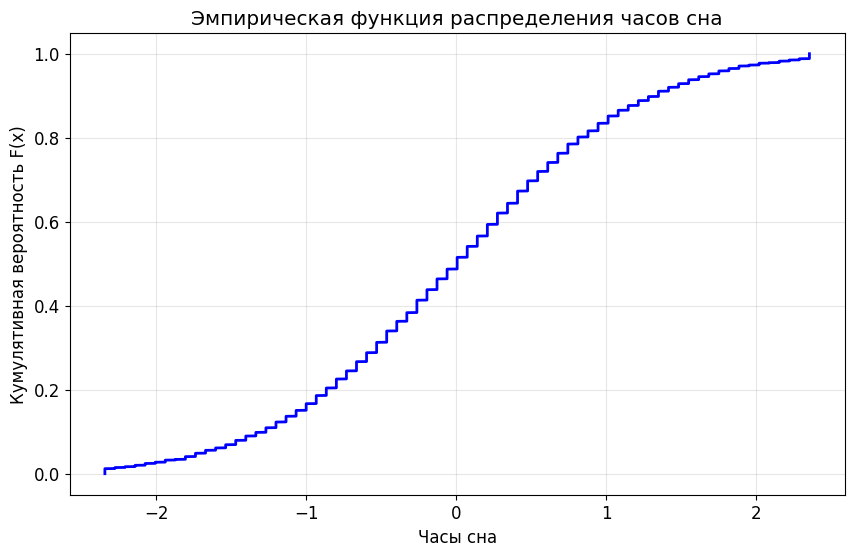

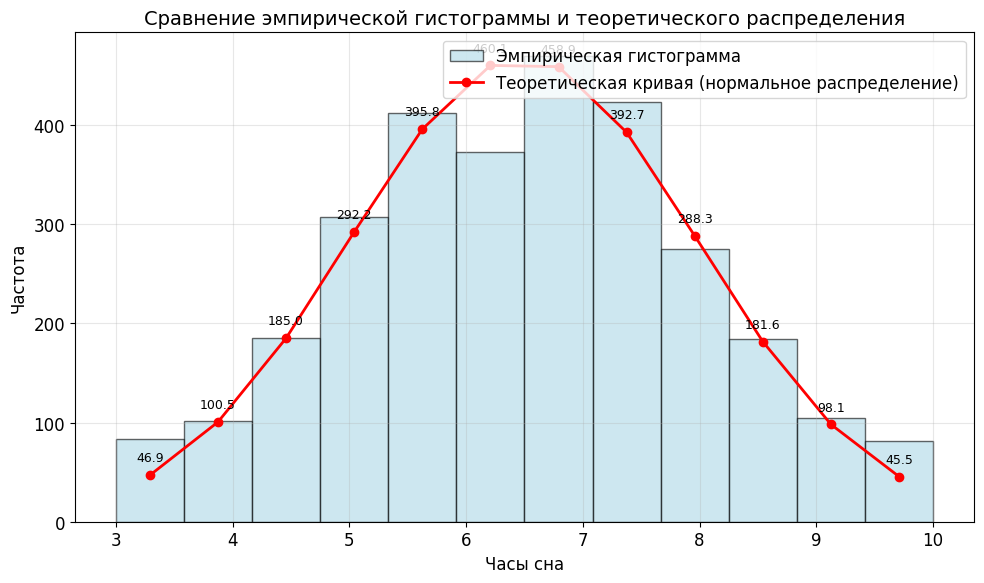

Наблюдаемое отклонение: 72.05185477536668
Критическое отклонение: 19.92
Гипотеза о нормальном распределении опровергается


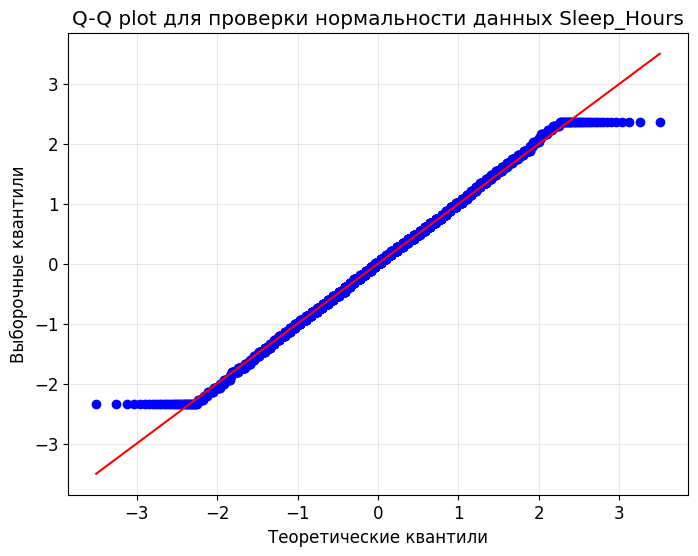

Тип изменения: log
Среднее значение: 1.99 часов
Дисперсия: 0.0435
Мода: 1.96 часов
Медиана: 2.01 часов
Q1 (25%): 1.87 часов
Q2 (50%): 2.01 часов
Q3 (75%): 2.14 часов
Эксцесс Ex: 0.184
Интерпретация: Распределение имеет острый пик (по сравнению с нормальным).
При этом распределение считается приближается к нормальному.
Асимметрия: -0.544
Скошенность: распределение скошено влево (преобладают отрицательные отклонения)
Степень асимметрии: большая
Интерквартильный размах: 0.27 часа/ов


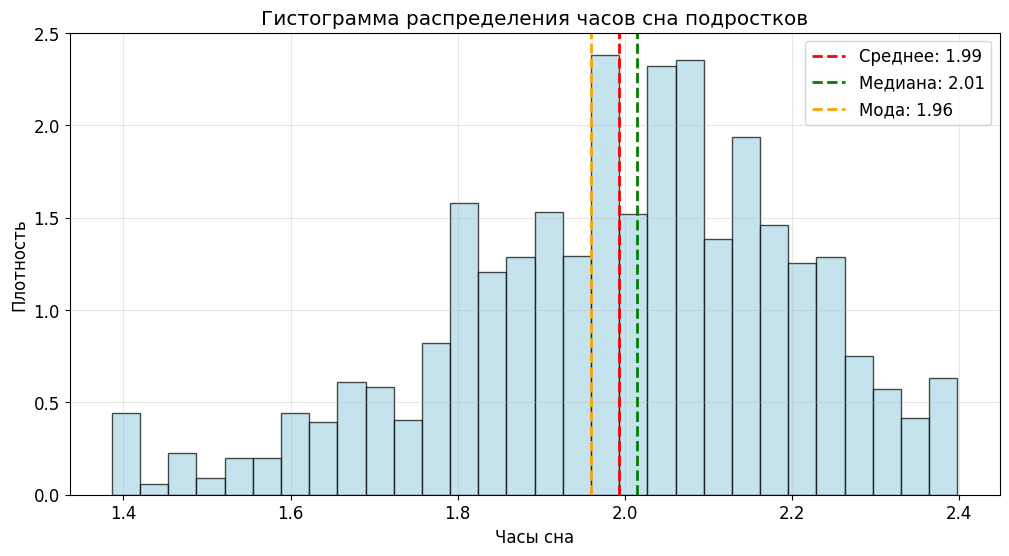

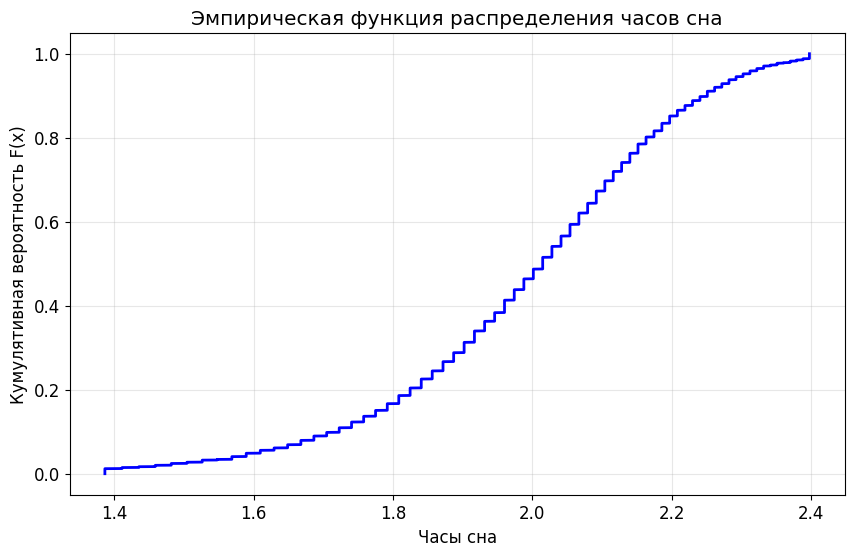

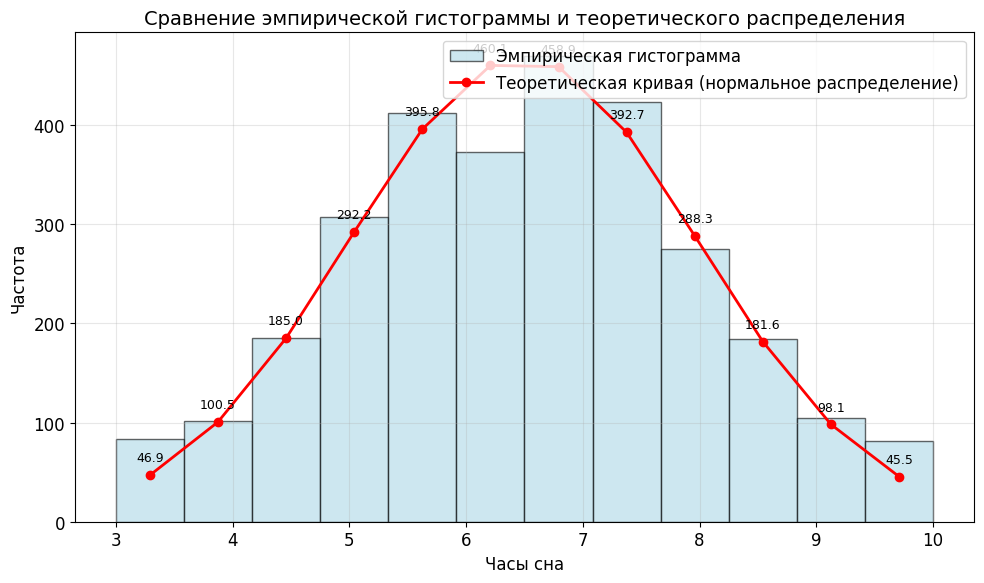

Наблюдаемое отклонение: 263.38245314038534
Критическое отклонение: 19.92
Гипотеза о нормальном распределении опровергается


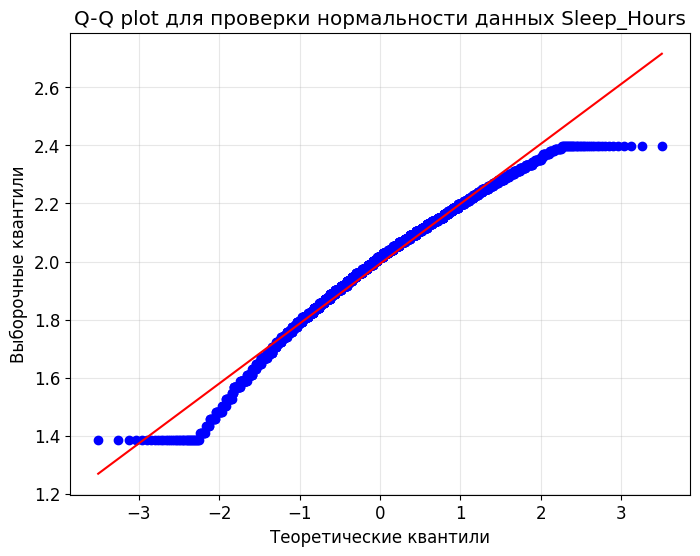

Тип изменения: normalized
Среднее значение: 0.50 часов
Дисперсия: 0.0453
Мода: 0.44 часов
Медиана: 0.50 часов
Q1 (25%): 0.36 часов
Q2 (50%): 0.50 часов
Q3 (75%): 0.64 часов
Эксцесс Ex: -0.297
Интерпретация: Распределение имеет плосковершинную форму (по сравнению с нормальным, у которого Ex=0).
При этом распределение считается приближается к нормальному.
Асимметрия: 0.012
Скошенность: распределение скошено вправо (преобладают положительные отклонения)
Степень асимметрии: малая
Интерквартильный размах: 0.29 часа/ов


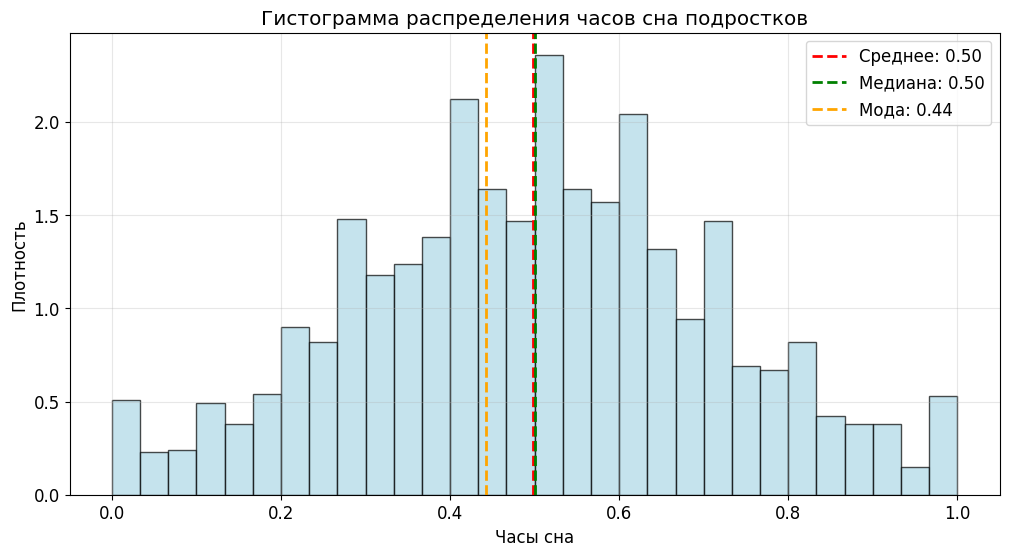

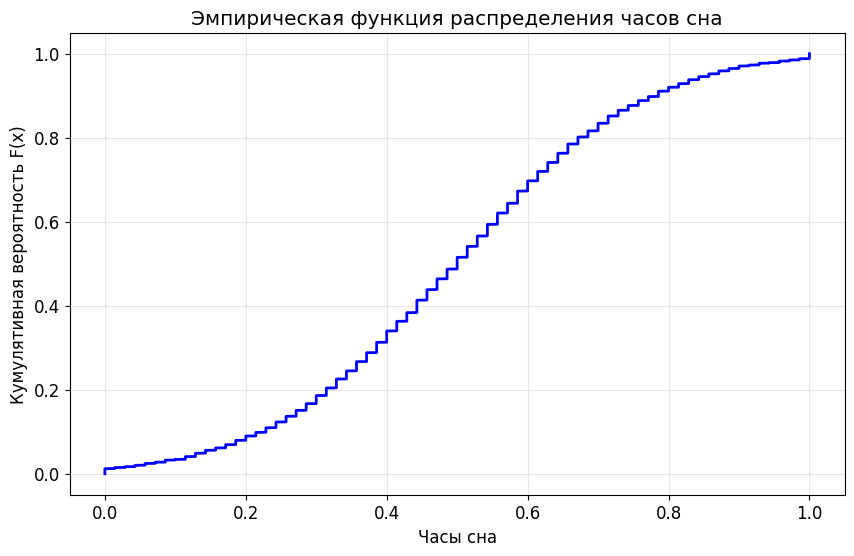

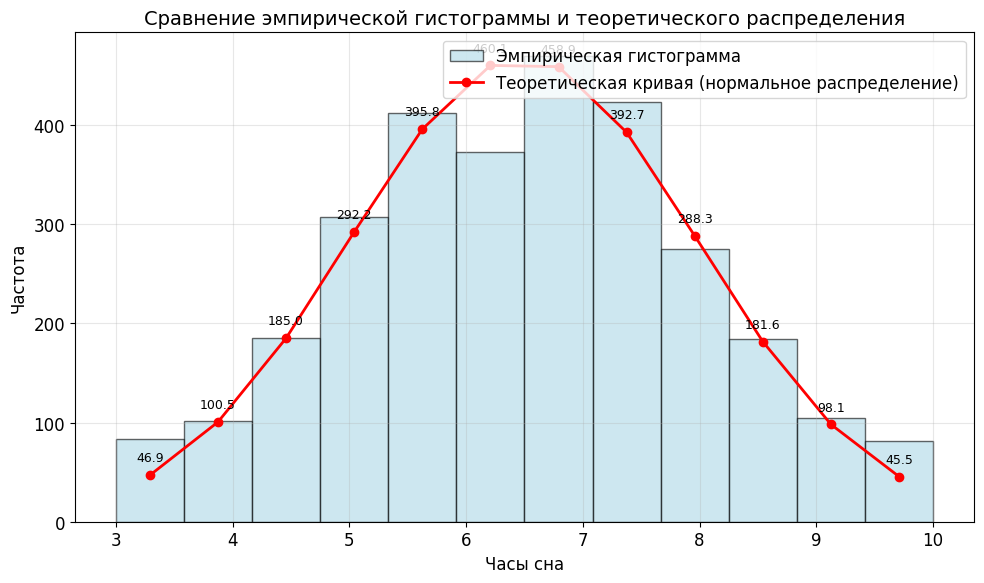

Наблюдаемое отклонение: 77.21877680979898
Критическое отклонение: 19.92
Гипотеза о нормальном распределении опровергается


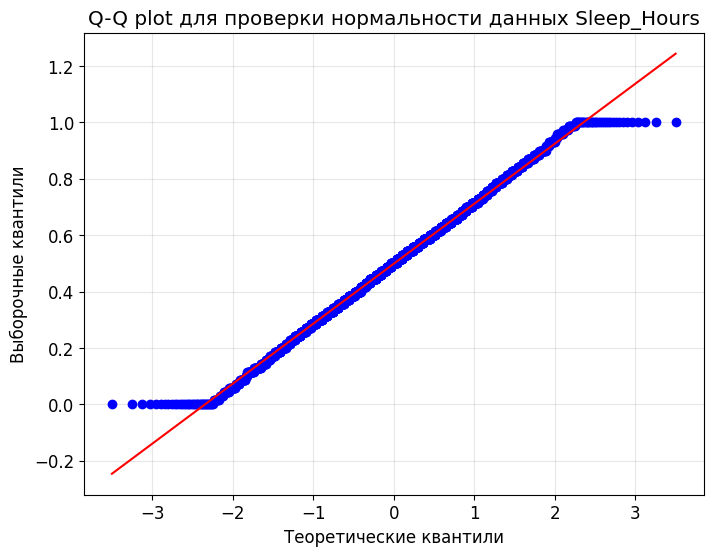

Тип изменения: iqr
Среднее значение: 6.49 часов
Дисперсия: 2.2215
Мода: 6.10 часов
Медиана: 6.50 часов
Q1 (25%): 5.50 часов
Q2 (50%): 6.50 часов
Q3 (75%): 7.50 часов
Эксцесс Ex: -0.297
Интерпретация: Распределение имеет плосковершинную форму (по сравнению с нормальным, у которого Ex=0).
При этом распределение считается приближается к нормальному.
Асимметрия: 0.012
Скошенность: распределение скошено вправо (преобладают положительные отклонения)
Степень асимметрии: малая
Интерквартильный размах: 2.00 часа/ов


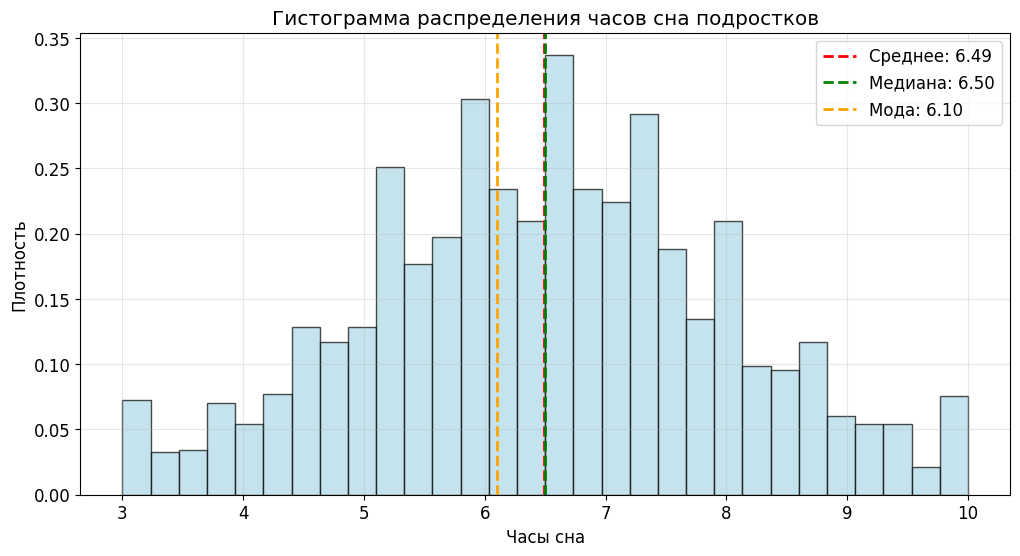

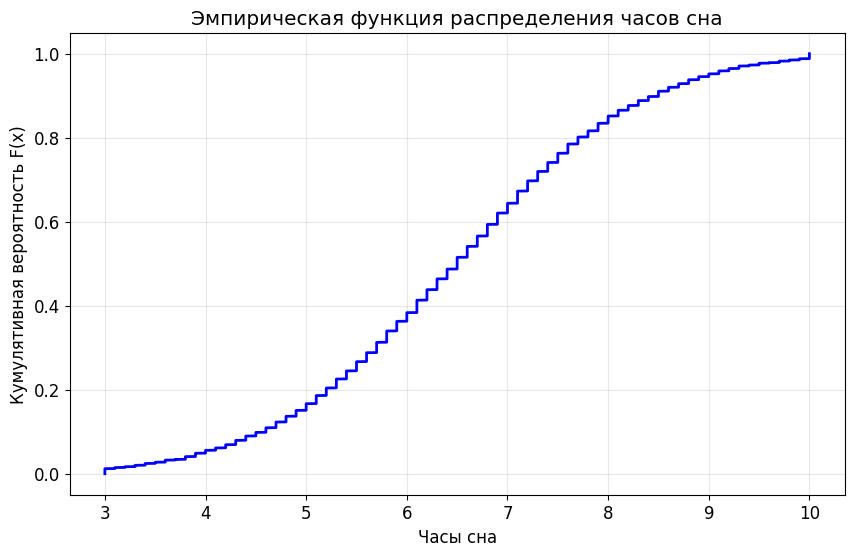

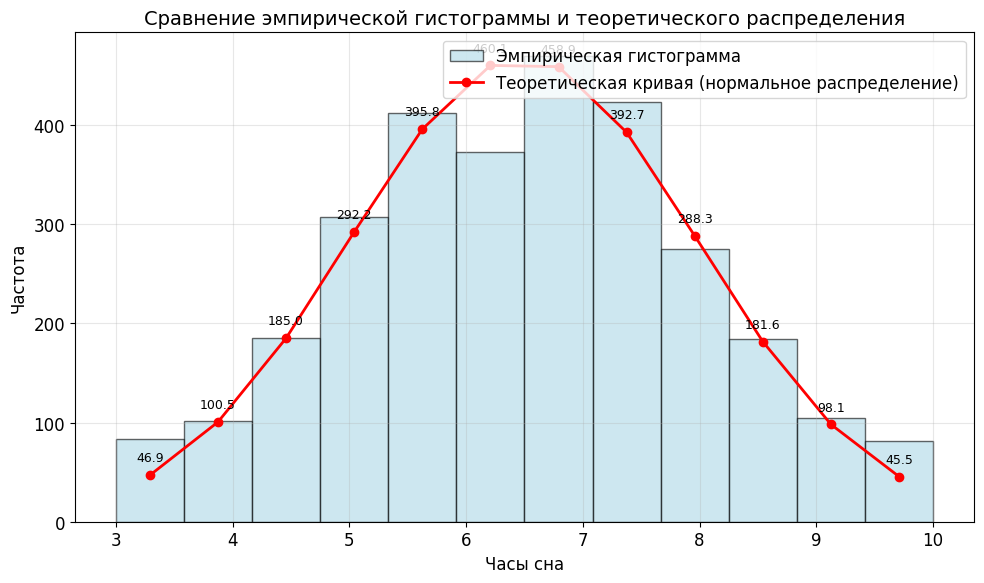

Наблюдаемое отклонение: 77.21877680979797
Критическое отклонение: 19.92
Гипотеза о нормальном распределении опровергается


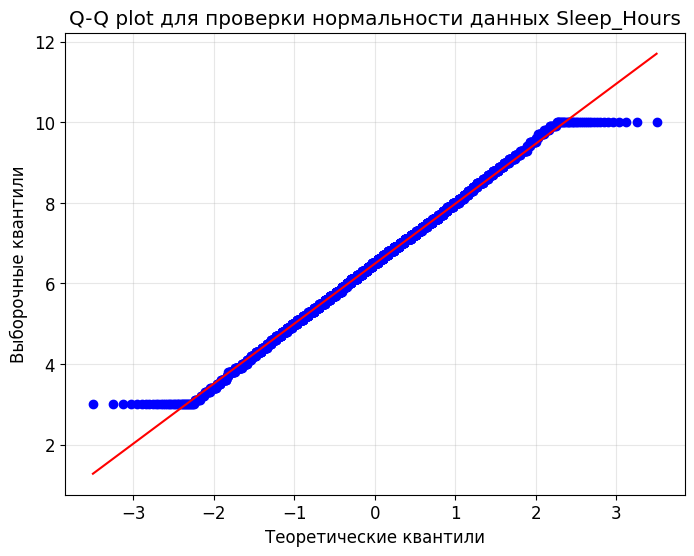

In [364]:
for k, v in preprocessed_data.items():
    sleep_hours_processed = v
    print("Тип изменения:", k)
    mean_value = sleep_hours_processed.mean()
    print(f"Среднее значение: {mean_value:.2f} часов")

    variance = np.var(sleep_hours_processed, ddof=0)
    std_dev = np.std(sleep_hours_processed)
    print(f"Дисперсия: {variance:.4f}")

    mode_result = mode(sleep_hours_processed, keepdims=True)
    mode_value = mode_result.mode[0]
    print(f"Мода: {mode_value:.2f} часов")

    median_value = np.median(sleep_hours_processed)
    print(f"Медиана: {median_value:.2f} часов")

    q25 = np.percentile(sleep_hours_processed, 25)
    q50 = np.percentile(sleep_hours_processed, 50)
    q75 = np.percentile(sleep_hours_processed, 75)

    print(f"Q1 (25%): {q25:.2f} часов")
    print(f"Q2 (50%): {q50:.2f} часов")
    print(f"Q3 (75%): {q75:.2f} часов")

    Ex = stats.kurtosis(sleep_hours_processed)

    if Ex > 0:
        interp = "Распределение имеет острый пик (по сравнению с нормальным)."
    elif Ex < 0:
        interp = "Распределение имеет плосковершинную форму (по сравнению с нормальным, у которого Ex=0)."
    else:
        interp = "Распределение совпадает по форме с нормальным."
    if -0.5 < Ex < 3:
        interp += "\nПри этом распределение считается приближается к нормальному."

    print(f"Эксцесс Ex: {Ex:.3f}\nИнтерпретация: {interp}")

    A_s = stats.skew(sleep_hours_processed)

    if A_s > 0:
        skew_direction = "распределение скошено вправо (преобладают положительные отклонения)"
    elif A_s < 0:
        skew_direction = "распределение скошено влево (преобладают отрицательные отклонения)"
    else:
        skew_direction = "распределение симметрично"

    abs_A_s = abs(A_s)

    if abs_A_s <= 0.25:
        skew_degree = "малая"
    elif 0.25 < abs_A_s <= 0.5:
        skew_degree = "умеренная"
    elif 0.5 < abs_A_s <= 1.5:
        skew_degree = "большая"
    else:
        skew_degree = "исключительно большая"

    print(f"Асимметрия: {A_s:.3f}\nСкошенность: {skew_direction}\nСтепень асимметрии: {skew_degree}")

    iqr = q75 - q25
    print(f"Интерквартильный размах: {iqr:.2f} часа/ов")

    # Построение гистограммы
    plt.figure(figsize=(12, 6))

    # Гистограмма
    plt.hist(sleep_hours_processed, bins=30, density=True, alpha=0.7, color='lightblue', edgecolor='black')

    # Добавляем вертикальные линии для статистик
    plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Среднее: {mean_value:.2f}')
    plt.axvline(median_value, color='green', linestyle='--', linewidth=2, label=f'Медиана: {median_value:.2f}')
    plt.axvline(mode_value, color='orange', linestyle='--', linewidth=2, label=f'Мода: {mode_value:.2f}')

    plt.xlabel('Часы сна')
    plt.ylabel('Плотность')
    plt.title('Гистограмма распределения часов сна подростков')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    # Построение эмпирической функции распределения
    plt.figure(figsize=(10, 6))

    # Сортируем данные
    sorted_data = np.sort(sleep_hours_processed)
    # Вычисляем кумулятивные вероятности
    cumulative_prob = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

    # Строим ECDF
    plt.plot(sorted_data, cumulative_prob, linewidth=2, color='blue')
    plt.xlabel('Часы сна')
    plt.ylabel('Кумулятивная вероятность F(x)')
    plt.title('Эмпирическая функция распределения часов сна')
    plt.grid(True, alpha=0.3)
    plt.show()

    n_o_new, x_o_new = interval_variation_series(sleep_hours_processed)
    n_e_new = expected_normal_dist_freq(np.min(sleep_hours_processed), np.max(sleep_hours_processed), sleep_hours_processed.mean(), np.std(sleep_hours_processed), n_o_new, x_o_new)

    plt.figure(figsize=(10, 6))

    # Построение эмпирической гистограммы
    bins = sturges_formula(len(sleep_hours))
    plt.hist(sleep_hours, bins=bins, alpha=0.6, color='lightblue',
            edgecolor='black', label='Эмпирическая гистограмма')

    # Построение теоретической кривой через точки (x_o, n_e)
    plt.plot(x_o, n_e, 'ro-', linewidth=2, markersize=6,
            color='red', label='Теоретическая кривая (нормальное распределение)')

    plt.xlabel('Часы сна', fontsize=12)
    plt.ylabel('Частота', fontsize=12)
    plt.title('Сравнение эмпирической гистограммы и теоретического распределения', fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Добавление значений на точки теоретической кривой
    for i, (x, y) in enumerate(zip(x_o, n_e)):
        plt.annotate(f'{y:.1f}', (x, y), textcoords="offset points",
                    xytext=(0,10), ha='center', fontsize=9)

    plt.tight_layout()
    plt.show()

    chi2_stat_new = calc_chi2(n_o_new, n_e_new)
    print(f"Наблюдаемое отклонение: {chi2_stat_new}\nКритическое отклонение: {chi2_critical}")
    if chi2_stat > chi2_critical:
        print("Гипотеза о нормальном распределении опровергается")
    else:
        print("Гипотеза о нормальном распределении не опровергается")

    plt.figure(figsize=(8, 6))
    stats.probplot(sleep_hours_processed, dist="norm", plot=plt)
    plt.title('Q-Q plot для проверки нормальности данных Sleep_Hours')
    plt.xlabel('Теоретические квантили')
    plt.ylabel('Выборочные квантили')
    plt.grid(True, alpha=0.3)
    plt.show()



Как можно видеть, во всех случаях гипотеза Пирсона опровергается, несмотря на визуальное приближение к нормальному распределению в некоторых случаях. Логарифмирование даже больше искажает данные.

Большое отклонение в метрике Пирсона обусловлено выбросами в некоторых местах. Например в одном из центральных интервалах слишком попало  мало вариантов.

## 4. Анализ по группам School_Grade

1. На одном графике постройте гистограммы для каждой группы.
2. Рассчитайте среднее, дисперсию внутри каждой группы

In [15]:
print("="*60)
print("АНАЛИЗ ПО ШКОЛЬНЫМ КЛАССАМ (School_Grade)")
print("="*60)

print("Доступные школьные классы:")
school_grades = df['School_Grade'].value_counts().sort_index()
print(school_grades)

print(f"\nВсего классов: {len(school_grades)}")
print(f"Общий размер выборки: {len(df)}")
grouped_data = df.groupby('School_Grade')[col]

АНАЛИЗ ПО ШКОЛЬНЫМ КЛАССАМ (School_Grade)
Доступные школьные классы:
School_Grade
10th    487
11th    479
12th    529
7th     497
8th     482
9th     526
Name: count, dtype: int64

Всего классов: 6
Общий размер выборки: 3000


In [17]:
from tabulate import tabulate

print("\nСТАТИСТИКИ ПО КАЖДОМУ КЛАССУ:")
print("-" * 70)

stats_by_grade = []

for grade, group_data in grouped_data:
    count = len(group_data)
    mean_val = group_data.mean()
    var_val = group_data.var()
    std_val = group_data.std()
    median_val = group_data.median()

    stats_by_grade.append([
        grade,
        count,
        f"{mean_val:.3f}",
        f"{var_val:.3f}",
        f"{std_val:.3f}",
        f"{median_val:.3f}"
    ])

headers = ["Класс", "Кол-во", "Среднее", "Дисперсия", "Стд.откл", "Медиана"]
print(tabulate(stats_by_grade, headers=headers, tablefmt="grid"))

stats_df = pd.DataFrame(stats_by_grade, columns=headers)

print("\nОБЩАЯ СТАТИСТИКА:")
print(f"Общее среднее: {df[col].mean():.4f}")
print(f"Общая дисперсия: {df[col].var():.4f}")
print(f"Межгрупповая дисперсия: {stats_df['Среднее'].astype(float).var():.4f}")
print(f"Средняя внутригрупповая дисперсия: {stats_df['Дисперсия'].astype(float).mean():.4f}")



СТАТИСТИКИ ПО КАЖДОМУ КЛАССУ:
----------------------------------------------------------------------
+---------+----------+-----------+-------------+------------+-----------+
| Класс   |   Кол-во |   Среднее |   Дисперсия |   Стд.откл |   Медиана |
+=========+==========+===========+=============+============+===========+
| 10th    |      487 |     6.488 |       2.102 |      1.45  |       6.4 |
+---------+----------+-----------+-------------+------------+-----------+
| 11th    |      479 |     6.367 |       2.113 |      1.454 |       6.4 |
+---------+----------+-----------+-------------+------------+-----------+
| 12th    |      529 |     6.46  |       2.202 |      1.484 |       6.5 |
+---------+----------+-----------+-------------+------------+-----------+
| 7th     |      497 |     6.484 |       2.288 |      1.512 |       6.5 |
+---------+----------+-----------+-------------+------------+-----------+
| 8th     |      482 |     6.675 |       2.407 |      1.551 |       6.7 |
+---------

ВИЗУАЛИЗАЦИЯ РАСПРЕДЕЛЕНИЙ ПО КЛАССАМ


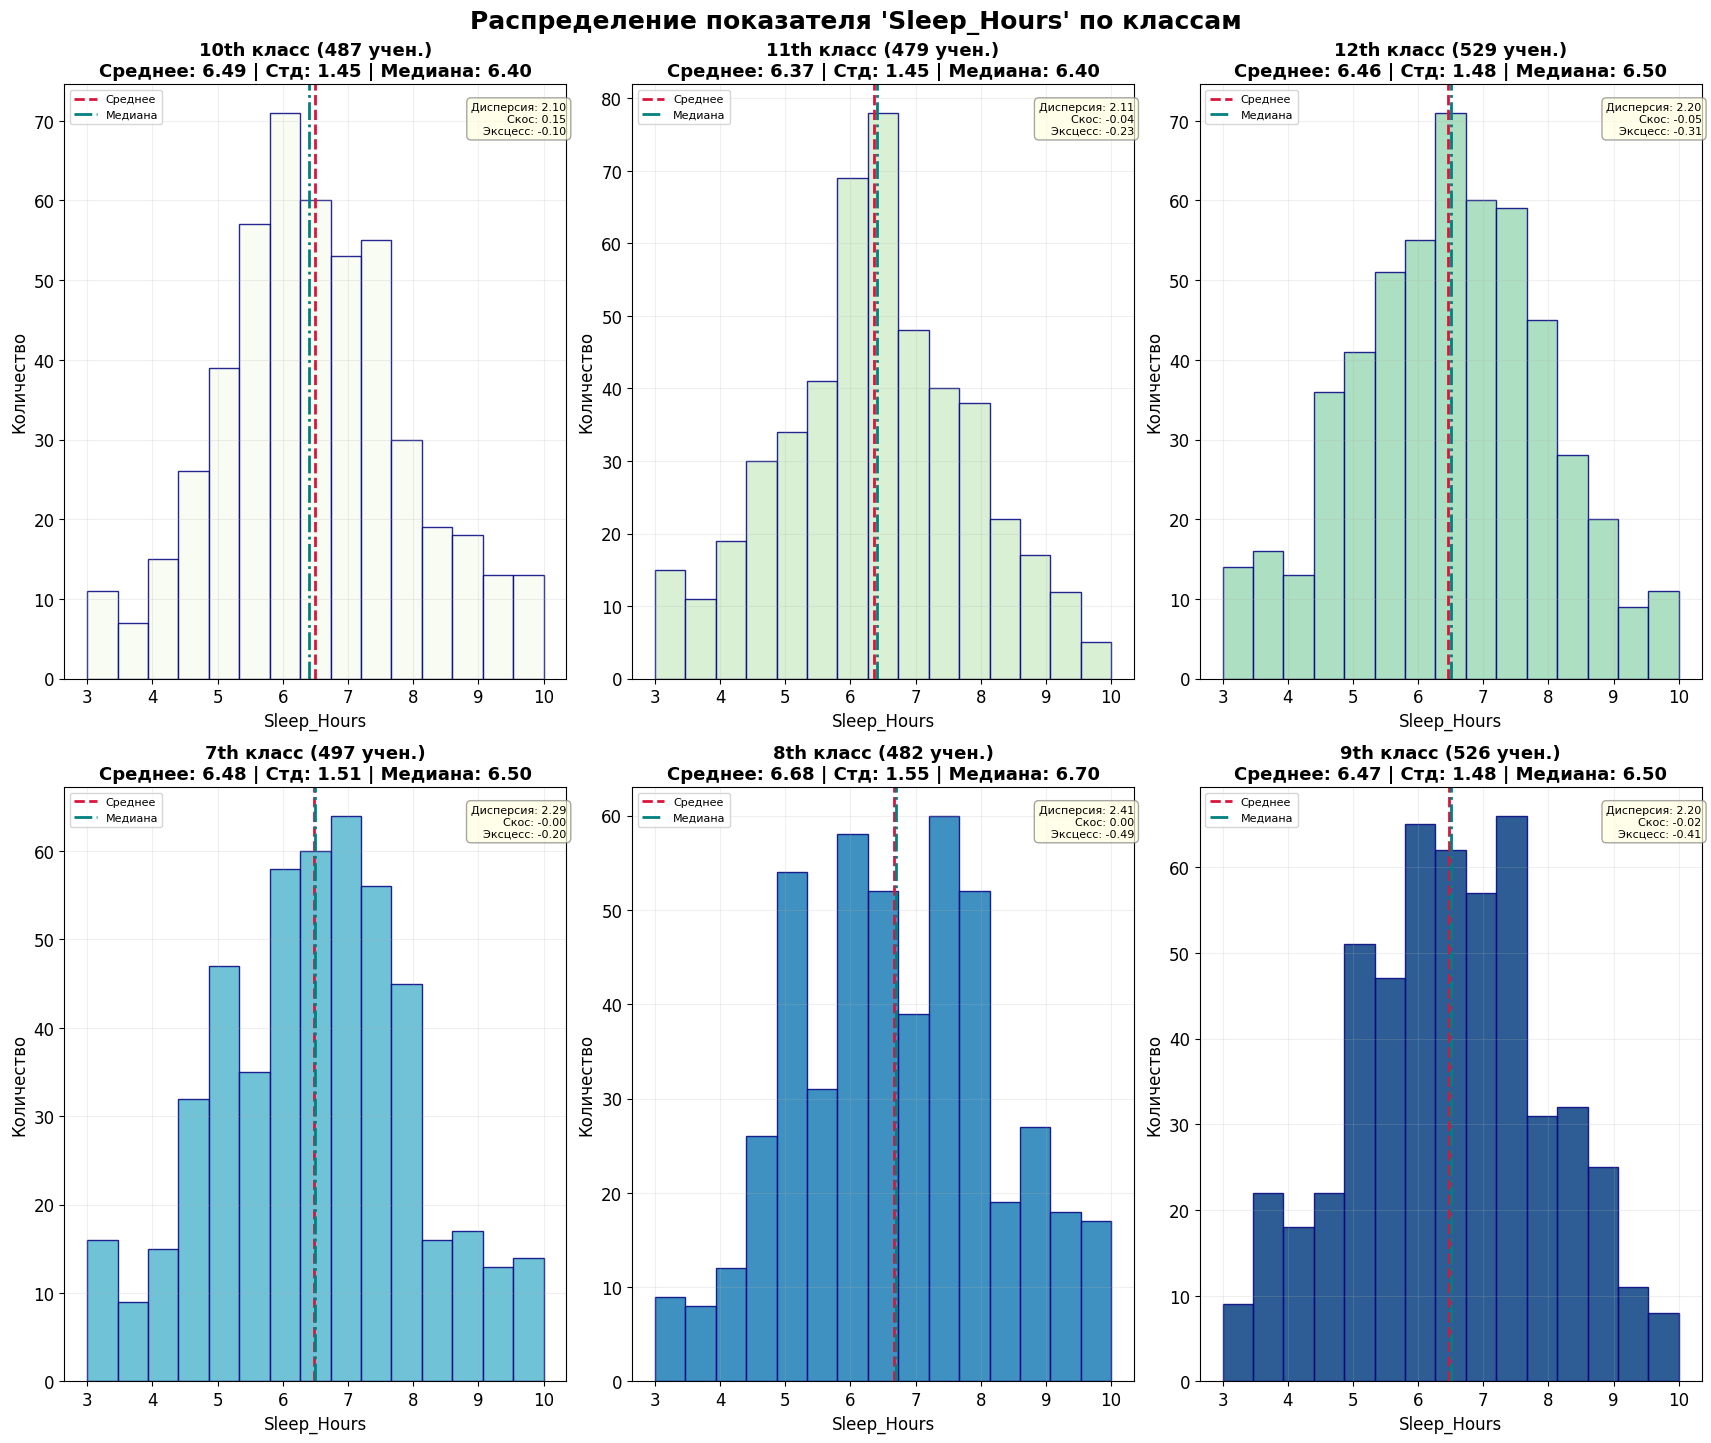

In [20]:
import matplotlib.pyplot as plt
import numpy as np

print("=" * 60)
print("ВИЗУАЛИЗАЦИЯ РАСПРЕДЕЛЕНИЙ ПО КЛАССАМ")
print("=" * 60)

grades = list(grouped_data.groups.keys())
num_grades = len(grades)

palette = plt.cm.GnBu(np.linspace(0, 1, num_grades))

columns = 3
rows = (num_grades + columns - 1) // columns

fig, axes = plt.subplots(rows, columns, figsize=(17, 7 * rows), constrained_layout=True)

if rows == 1 and columns == 1:
    axes = np.array([[axes]])
elif rows == 1:
    axes = axes.reshape(1, -1)
elif columns == 1:
    axes = axes.reshape(-1, 1)

overall_min, overall_max = df[col].min(), df[col].max()

for idx, (grade, data) in enumerate(grouped_data):
    r, c = divmod(idx, columns)
    ax = axes[r, c]

    hist_vals, bin_edges, patches = ax.hist(
        data,
        bins=15,
        color=palette[idx],
        alpha=0.85,
        edgecolor='navy',
        linewidth=1,
        range=(overall_min, overall_max)
    )

    mean_ = data.mean()
    std_ = data.std()
    med_ = data.median()
    var_ = data.var()
    skew_ = data.skew()
    kurt_ = data.kurtosis()
    n_ = len(data)

    ax.set_title(f"{grade} класс ({n_} учен.)\nСреднее: {mean_:.2f} | Стд: {std_:.2f} | Медиана: {med_:.2f}",
                 fontsize=13, fontweight='semibold')

    ax.axvline(mean_, color='crimson', linestyle='dashed', linewidth=2)
    ax.axvline(med_, color='teal', linestyle='dashdot', linewidth=2)

    ax.set_xlabel(col)
    ax.set_ylabel("Количество")
    ax.grid(visible=True, alpha=0.2)
    ax.text(
        1, 0.97,
        f"Дисперсия: {var_:.2f}\nСкос: {skew_:.2f}\nЭксцесс: {kurt_:.2f}",
        transform=ax.transAxes,
        fontsize=8,
        verticalalignment="top",
        horizontalalignment="right",
        bbox=dict(facecolor='lightyellow', edgecolor='gray', boxstyle='round,pad=0.4', alpha=0.7)
    )
    ax.legend([f"Среднее", f"Медиана"], loc="upper left", fontsize=8)

for extra in range(num_grades, rows * columns):
    r, c = divmod(extra, columns)
    fig.delaxes(axes[r, c])

fig.suptitle(f"Распределение показателя '{col}' по классам", fontsize=18, fontweight='bold', y=1.02)
plt.show()


Видно, что статистические характеристики распределений между группами очень близки. Средние и медианные значения внутри каждой группы почти совпадают с показателями по всей выборке. Размеры групп сопоставимы, что позволяет с уверенностью говорить о сопоставимости распределений между ними.